# Task 2: Predict Future Stock Prices (Short-Term)

## Objective
Use historical stock data to predict the next day's closing price.

## Dataset
Stock market data from Yahoo Finance (retrieved using the yfinance Python library)

## Instructions
- Select a stock (e.g., Apple, Tesla).
- Load historical data using the `yfinance` library.
- Use features like Open, High, Low, and Volume to predict the next Close price.
- Train a Linear Regression or Random Forest model.
- Plot actual vs predicted closing prices for comparison.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

In [5]:
data = pd.read_csv("APPL.csv")
# Preview the data
data.head()


,Date,Close,High,Low,Open,Volume
0,1980-12-12,0.098485,0.098913,0.098485,0.098485,469033600
1,1980-12-15,0.093347,0.093775,0.093347,0.093775,175884800
2,1980-12-16,0.086495,0.086924,0.086495,0.086924,105728000
3,1980-12-17,0.088636,0.089064,0.088636,0.088636,86441600
4,1980-12-18,0.091206,0.091634,0.091206,0.091206,73449600


In [6]:
# Shift Close column by -1 to get next day's price
data['Target_Close'] = data['Close'].shift(-1)

# Drop last row (NaN target)
data = data.dropna()

# Features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target_Close']

print(X.head())
print(y.head())

       Open      High       Low     Volume
0  0.098485  0.098913  0.098485  469033600
1  0.093775  0.093775  0.093347  175884800
2  0.086924  0.086924  0.086495  105728000
3  0.088636  0.089064  0.088636   86441600
4  0.091206  0.091634  0.091206   73449600
0    0.093347
1    0.086495
2    0.088636
3    0.091206
4    0.096772
Name: Target_Close, dtype: float64


In [7]:
# For time series, do not shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (9020, 4)
Test size: (2255, 4)


In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)

Linear Regression MSE: 6.215502135205886
Linear Regression R2: 0.9986325148782184


In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)

Random Forest MSE: 12250.557521057004
Random Forest R2: -1.6952697914279065


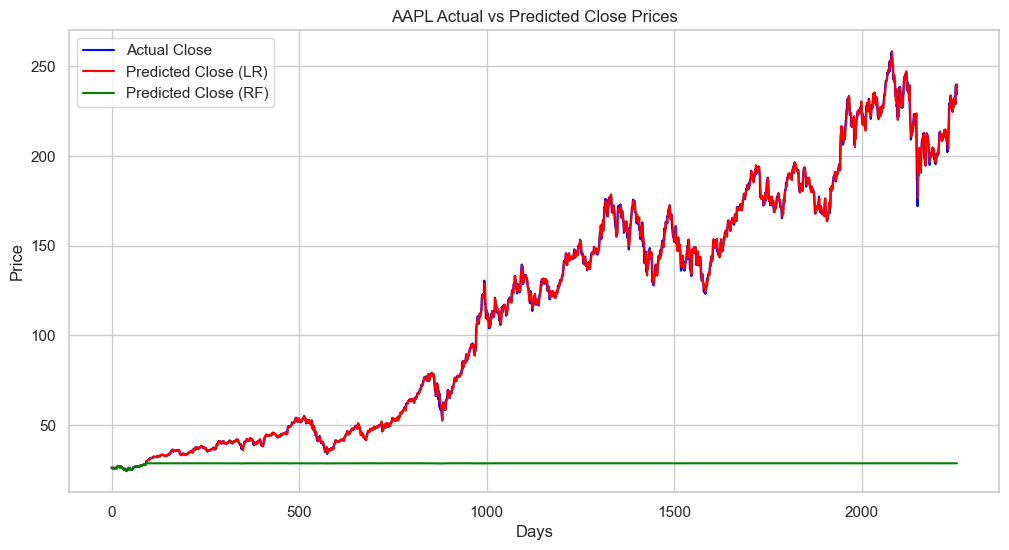

In [10]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred_lr, label='Predicted Close (LR)', color='red')
plt.plot(y_pred_rf, label='Predicted Close (RF)', color='green')
plt.title('AAPL Actual vs Predicted Close Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()